<a href="https://colab.research.google.com/github/Karen9955/Data/blob/main/1MR_predict_prothet_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Прогнозирование выручки и продаж товарных групп для маркета
 97ce4797-cc7a-4088-8e5c-aed0f8e25e4f



In [1]:
#   97ce4797-cc7a-4088-8e5c-aed0f8e25e4f

#Загрузка данных


In [2]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
#import mplcursors
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#загружаем таблицу orders_mr
df = pd.read_csv('drive/My Drive/data/orders_mr.csv')

In [5]:
#Создаем столбец с данными о выручке от продажи
df['revenue'] = df.quantity * df.price

In [6]:
# меняем типы данных
df['created_at'] = pd.to_datetime(df['created_at'])

In [7]:
df['date'] = df['created_at'].dt.floor('D')

In [8]:
df['dayweek'] = df['created_at'].dt.weekday

In [9]:
df['date_with_hour'] = df['created_at'].dt.strftime('%Y-%m-%d %H')
df['date_with_hour'] = pd.to_datetime(df['date_with_hour'])
# df['created_at'].dt.floor('H')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84259 entries, 0 to 84258
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   orderId         84259 non-null  int64         
 1   productId       84259 non-null  object        
 2   quantity        84259 non-null  int64         
 3   price           84259 non-null  float64       
 4   discount        84259 non-null  float64       
 5   customerId      84259 non-null  object        
 6   fridgeId        84259 non-null  object        
 7   created_at      84259 non-null  datetime64[ns]
 8   product_name    84259 non-null  object        
 9   categoryId      84259 non-null  object        
 10  category_name   84259 non-null  object        
 11  revenue         84259 non-null  float64       
 12  date            84259 non-null  datetime64[ns]
 13  dayweek         84259 non-null  int64         
 14  date_with_hour  84259 non-null  datetime64[ns]
dtypes:

In [11]:
df.head(3)

,orderId,productId,quantity,price,discount,customerId,fridgeId,created_at,product_name,categoryId,category_name,revenue,date,dayweek,date_with_hour
0,1745,20f02ccb-bc28-4755-968c-c4692ea89ac8,1,90.0,0.0,9909b927-feb2-488c-b300-1d5a88e4fb8d,97ee9e2f-da7b-47c6-a118-1849df5e8618,2023-04-28 18:15:31,"Добрый лимон-лайм 0,5л",18cd6933-056d-4af9-8db2-24a50b3d3e1c,Напитки/Бакалея,90.0,2023-04-28,4,2023-04-28 18:00:00
1,1768,20f02ccb-bc28-4755-968c-c4692ea89ac8,1,90.0,0.0,9908c1e5-7b0c-460e-bb5d-6ada85fa7a22,97f04b27-363d-4bca-a0e4-803f8e13c8d0,2023-04-28 23:20:35,"Добрый лимон-лайм 0,5л",18cd6933-056d-4af9-8db2-24a50b3d3e1c,Напитки/Бакалея,90.0,2023-04-28,4,2023-04-28 23:00:00
2,2111,20f02ccb-bc28-4755-968c-c4692ea89ac8,1,90.0,0.0,99067528-4df4-4e69-aa3f-12a396521464,97ce4797-cc7a-4088-8e5c-aed0f8e25e4f,2023-05-01 13:28:07,"Добрый лимон-лайм 0,5л",18cd6933-056d-4af9-8db2-24a50b3d3e1c,Напитки/Бакалея,90.0,2023-05-01,0,2023-05-01 13:00:00


##Смотрим на распределение выручки по дням недели

In [12]:
df_w = df[['dayweek', 'revenue']]\
            .groupby('dayweek')\
            .sum('revenue')\
            .reset_index()

<Axes: xlabel='dayweek', ylabel='revenue'>

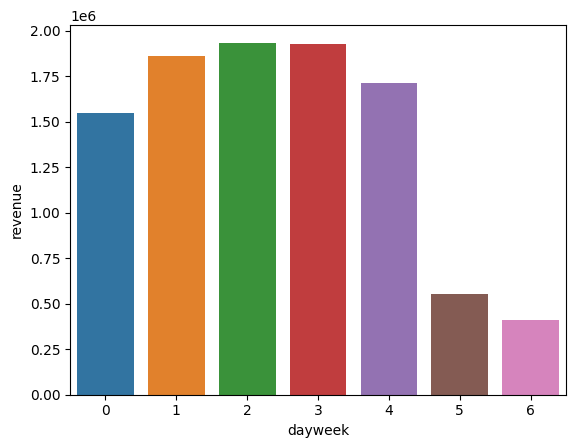

In [13]:
#Строим распределение выручки по дням недели
sns.barplot(x="dayweek",  y = 'revenue', data= df_w)

##Прогнозируем продажи для маркета gold '97ce4797-cc7a-4088-8e5c-aed0f8e25e4f'

##Распределение выручки по дням недели для маркета 'gold'

In [14]:
gold = '97ce4797-cc7a-4088-8e5c-aed0f8e25e4f'

In [15]:
df_gold = df[df.fridgeId == '97ce4797-cc7a-4088-8e5c-aed0f8e25e4f']

In [16]:
df_wg = df_gold[['dayweek', 'revenue']]\
            .groupby('dayweek')\
            .sum('revenue')\
            .reset_index()

In [17]:
df_wg

,dayweek,revenue
0,0,164575.0
1,1,189210.0
2,2,189980.0
3,3,195577.0
4,4,176820.0
5,5,210476.0
6,6,171996.0


<Axes: xlabel='dayweek', ylabel='revenue'>

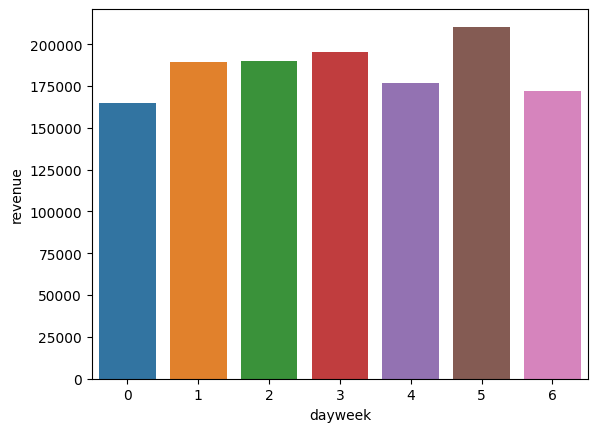

In [18]:
#Строим распределение выручки по дням недели для маркета gold (в субботу и воскресенье продажи не снижаются)
sns.barplot(x="dayweek",  y = 'revenue', data= df_wg)

In [19]:
# Продажи маркета gold  97ce4797-cc7a-4088-8e5c-aed0f8e25e4f
sales = df_gold.loc[:,['date', 'revenue']]

# to datetime64
sales['date'] = pd.DatetimeIndex(sales['date'])
#sales = sales.sort_index(ascending = False)

sales.dtypes

date       datetime64[ns]
revenue           float64
dtype: object

In [20]:
sales.shape

(11042, 2)

In [21]:
# Группируем данные по столбцу 'date'
daily_revenue = sales.groupby('date').sum()

In [22]:
daily_revenue.head(3)

,revenue
date,
2023-04-26,1330.0
2023-04-27,9669.0
2023-04-28,7725.0


In [23]:
#добавляем порядок дня
import numpy as np
dr = daily_revenue.copy()
dr['Time'] = np.arange(len(dr.index))
dr

,revenue,Time
date,,
2023-04-26,1330.0,0
2023-04-27,9669.0,1
2023-04-28,7725.0,2
2023-04-29,13631.0,3
2023-04-30,8853.0,4
...,...,...
2023-08-05,9385.0,101
2023-08-06,11864.0,102
2023-08-07,8091.0,103


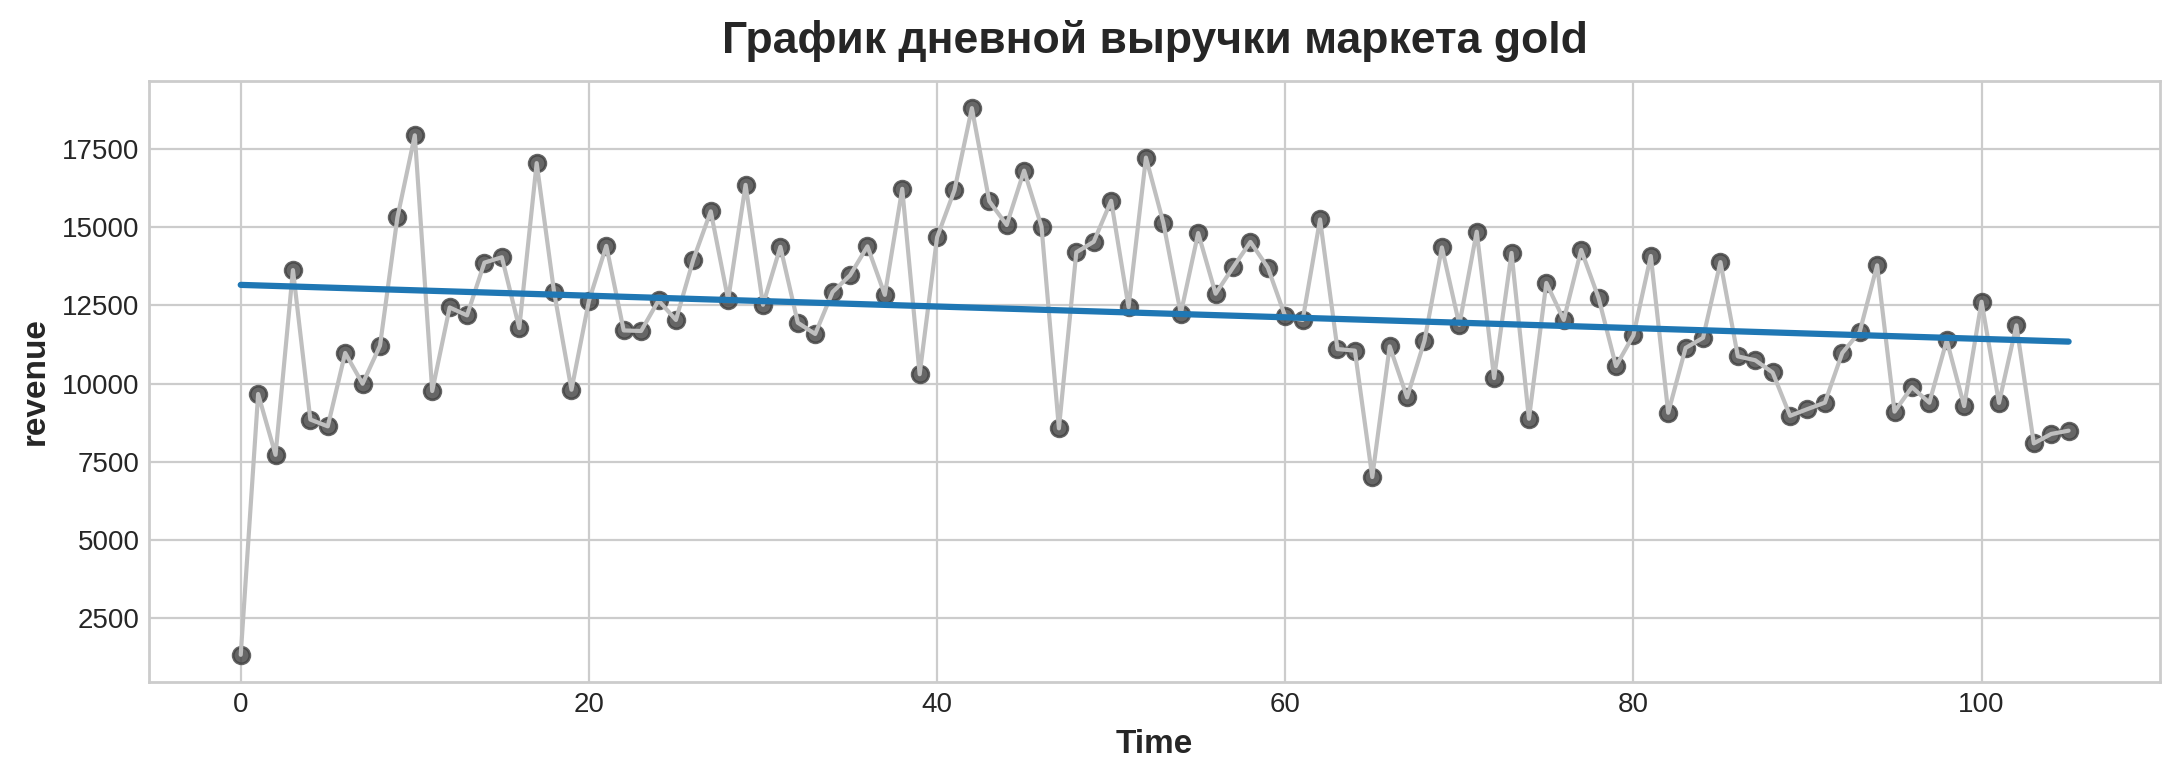

In [24]:
#Строим график тренда продаж по дням
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'revenue', data=dr, color='0.75')
ax = sns.regplot(x='Time', y='revenue', data=dr, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('График дневной выручки маркета gold');

##Потери по дням маркета 97ce4797-cc7a-4088-8e5c-aed0f8e25e4f

In [25]:
#загружаем таблицу orders_mr
df_lost = pd.read_csv('drive/My Drive/data/lost_mr.csv')


In [26]:
df_lost = df_lost.query('refundQuantity != 0')
#Создаем столбец с данными о потерянных деньгах
df_lost['lost_money'] = df_lost.refundQuantity * df_lost.price
#Столбец с датой переводим в datetime
df_lost['date'] = pd.to_datetime(df_lost['date'])
#Создаем столбец дня недели
df_lost['dayweek'] = df_lost['date'].dt.weekday

In [27]:
#Записываем в переменную df_lost_gold данные о потерях маркета gold
df_lost_gold = df_lost[df_lost.fridgeId == '97ce4797-cc7a-4088-8e5c-aed0f8e25e4f']

In [28]:
# Группируем данные по потерям маркета gold по дням недели и записываем в переменную df_lgw

df_lgw = df_lost_gold[['dayweek', 'lost_money']]\
            .groupby('dayweek')\
            .sum('lost_money')\
            .reset_index()

<Axes: xlabel='dayweek', ylabel='lost_money'>

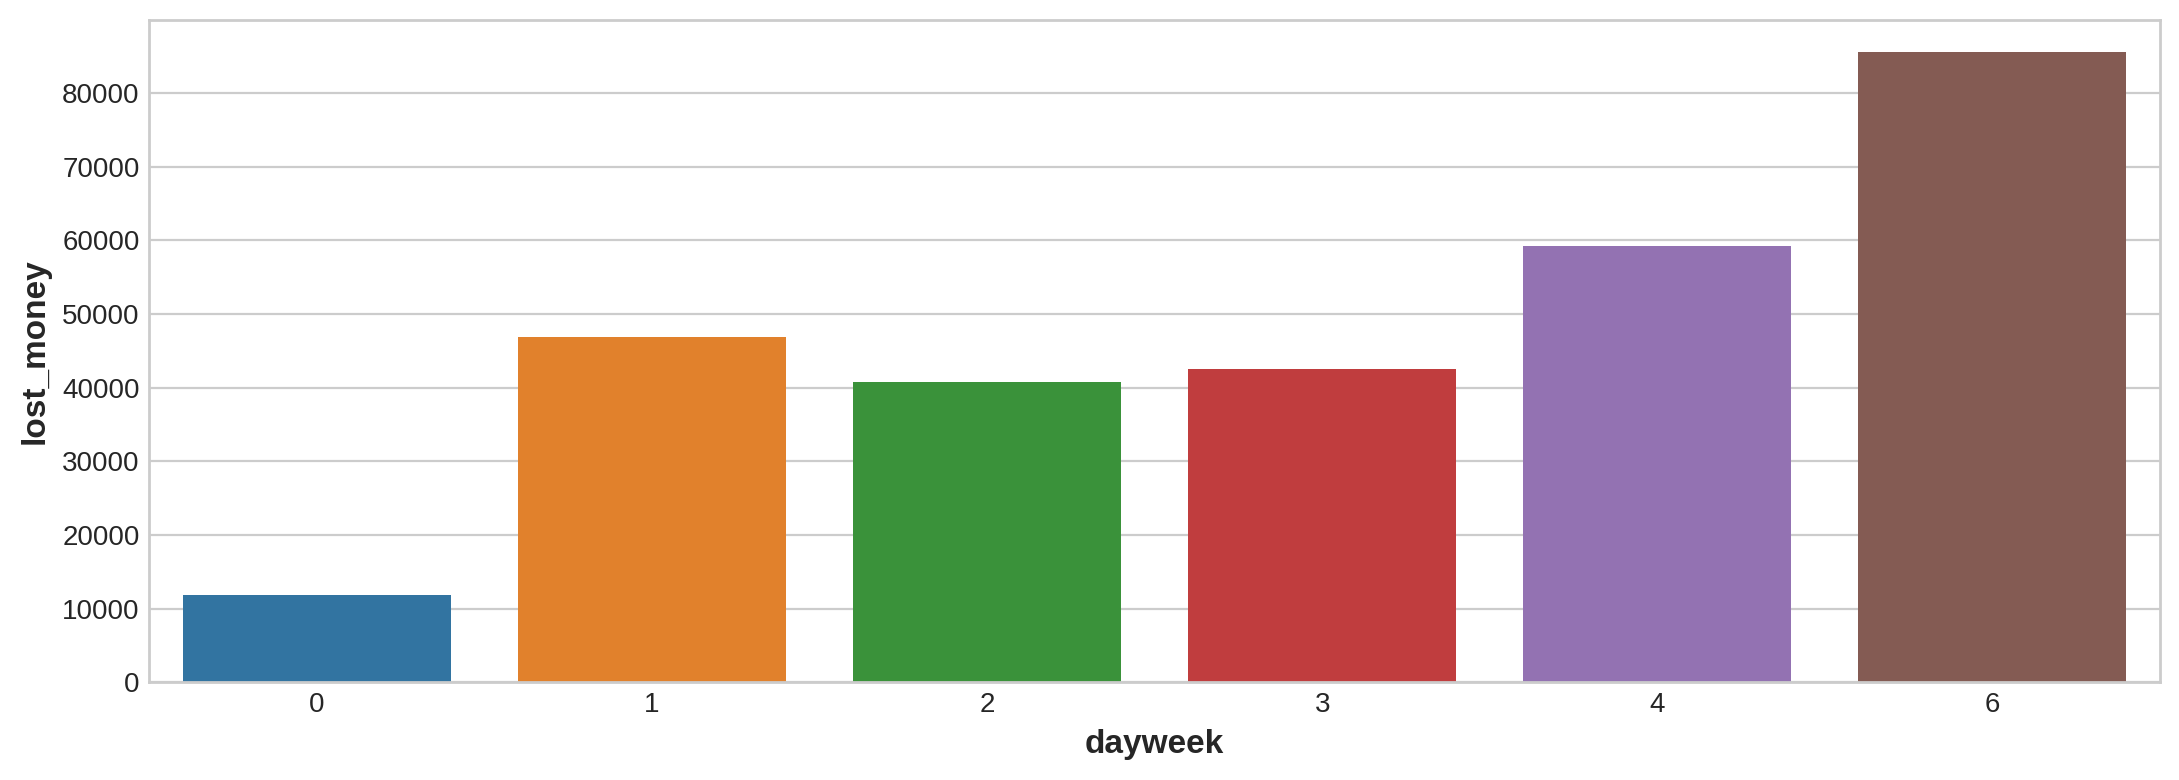

In [29]:
#Строим распределение lost_money по дням недели для маркета gold (по субботам данных нет - воскресенье фиксируют максимальные потери)
sns.barplot(x="dayweek",  y = 'lost_money', data= df_lgw)

##Сторим временной ряд потерь по маркету gold

In [30]:
# lost for the  97ce4797-cc7a-4088-8e5c-aed0f8e25e4f
lost = df_lost_gold.loc[:,['date', 'lost_money']]

# to datetime64
lost['date'] = pd.DatetimeIndex(lost['date'])
#sales = sales.sort_index(ascending = False)

lost.dtypes

date          datetime64[ns]
lost_money           float64
dtype: object

In [31]:
lost.shape

(753, 2)

In [32]:
# Группируем данные по столбцу 'date'
daily_lost = lost.groupby('date').sum()

In [33]:
#добавляем порядок дня
daily_lost['Time'] = np.arange(len(daily_lost.index))
daily_lost

,lost_money,Time
date,,
2023-04-02,1575.0,0
2023-04-03,865.0,1
2023-04-04,665.0,2
2023-04-05,365.0,3
2023-04-06,4470.0,4
...,...,...
2023-08-17,1520.0,107
2023-08-18,4100.0,108
2023-08-20,7515.0,109


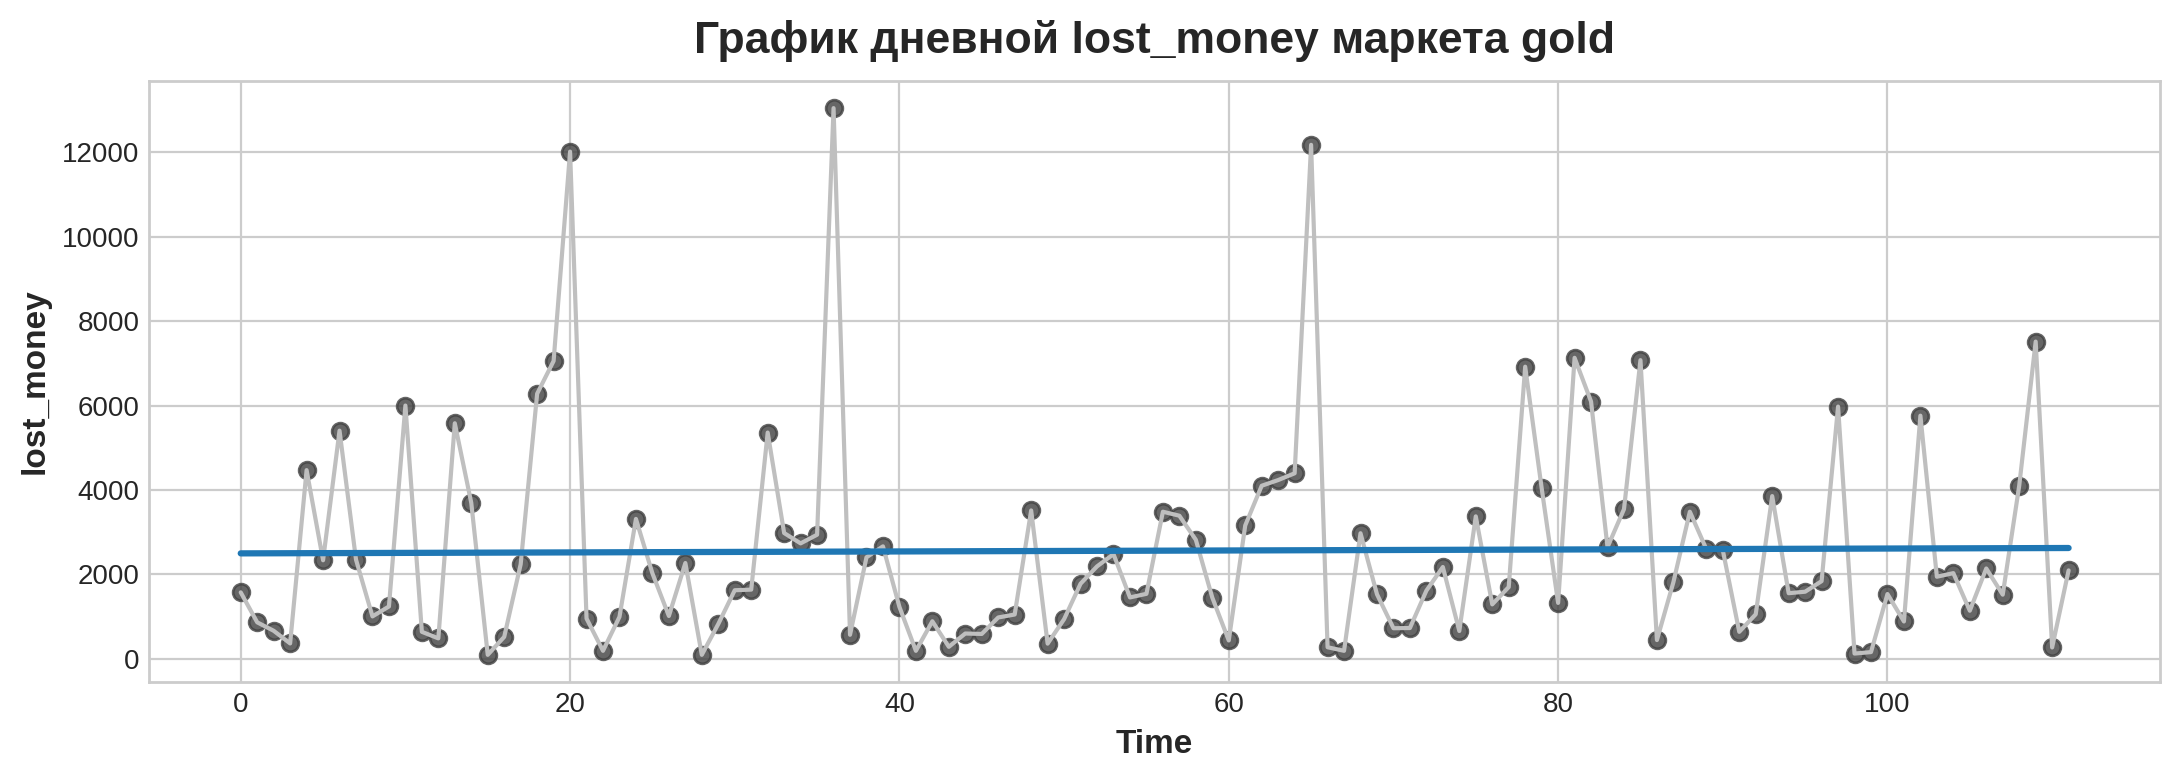

In [34]:
#Строим график тренда lost_money по дням
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'lost_money', data=daily_lost, color='0.75')
ax = sns.regplot(x='Time', y='lost_money', data=daily_lost, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('График дневной lost_money маркета gold');

##Объединяем таблицы dr (дневная выручка) и daily_lost  (дневные потери) по дате и рассчитываем долю потерь в выручке

In [35]:
# code

#Выбираем товарную группу для анализа выручки и потерь

In [36]:
df_gold.head(1)

,orderId,productId,quantity,price,discount,customerId,fridgeId,created_at,product_name,categoryId,category_name,revenue,date,dayweek,date_with_hour
2,2111,20f02ccb-bc28-4755-968c-c4692ea89ac8,1,90.0,0.0,99067528-4df4-4e69-aa3f-12a396521464,97ce4797-cc7a-4088-8e5c-aed0f8e25e4f,2023-05-01 13:28:07,"Добрый лимон-лайм 0,5л",18cd6933-056d-4af9-8db2-24a50b3d3e1c,Напитки/Бакалея,90.0,2023-05-01,0,2023-05-01 13:00:00


In [37]:
df_gold.category_name.value_counts()

Закуски            4053
Напитки/Бакалея    1905
Салаты             1383
Выпечка             983
Блинчики            878
Горячие блюда       689
Десерты             618
Кофе                265
Завтраки            260
Супы                  8
Name: category_name, dtype: int64

##Смотрим какие товары в маркете gold чаще всего в потерях (график строим по таблице df_lost_gold)

In [38]:
import plotly.express as px

# styling
sns.set_theme(style="dark")
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')
pd.set_option('display.max_columns', None)
pd.set_option('display.width',500)
pd.options.display.max_rows=150000

fig=px.histogram(data_frame = df_lost_gold, x='name', y="refundQuantity",
                 template="plotly_dark",color_discrete_sequence=px.colors.sequential.thermal_r,
                 title="Распределение потерь продукции по товарам маркета gold")
fig.update_layout(yaxis_title="Quantity",
                  xaxis_title="name")

##Выбираем для анализа салаты, выпечку, блинчики и  закуски
Название таблиц:

закуски: dfzak

выпечка:dfvipech

блинчики:dfbli

салаты:dfsal


In [39]:
dfzak = df_gold[df_gold.category_name == 'Закуски']
dfvipech = df_gold[df_gold.category_name == 'Выпечка']
dfbli = df_gold[df_gold.category_name == 'Блинчики']
dfsal = df_gold[df_gold.category_name == 'Салаты']

In [40]:
dfzak.shape, dfvipech.shape, dfbli.shape, dfsal.shape

((4053, 15), (983, 15), (878, 15), (1383, 15))

In [41]:
# смотрим что входит в закуски
dfzak['product_name'].value_counts()


Ролл с цыплёнком цезарь                 977
Ролл с ветчиной из индейки              667
Сэндвич с цыплёнком цезарь              518
Сэндвич ржаной с ветчиной из индейки    515
Шаверма                                 464
Панини с цыплёнком су-вид               263
Панини с ветчиной из индейки            236
Чикенбургер                             169
Куриные наггетсы                        131
Хот-дог                                 111
Овощные палочки                           2
Name: product_name, dtype: int64

##Строим временной ряд по закускам в маркете gold (по выручке и по по количеству)

In [50]:
dfzak.head(1)

,orderId,productId,quantity,price,discount,customerId,fridgeId,created_at,product_name,categoryId,category_name,revenue,date,dayweek,date_with_hour
34000,16741,24097e3f-0b67-437e-bcf8-086b107fe72b,1,175.0,0.0,9907c10e-0727-4f00-b08c-3e836ebc0a21,97ce4797-cc7a-4088-8e5c-aed0f8e25e4f,2023-05-31 08:37:04,Чикенбургер,bf60923b-5a67-47ec-b793-e8b68dfea9e9,Закуски,175.0,2023-05-31,2,2023-05-31 08:00:00


In [ ]:
# Продажи закусок маркета gold  97ce4797-cc7a-4088-8e5c-aed0f8e25e4f
sales_zak = dfzak.loc[:,['date', 'revenue','quantity']]
# to datetime64
sales_zak ['date'] = pd.DatetimeIndex(dfzak['date'])
# Группируем данные по столбцу 'date'
sales_zak = sales_zak.groupby('date').sum()
#добавляем порядок дня
sales_zak['Time'] = np.arange(len(sales_zak.index))
#sales_zak

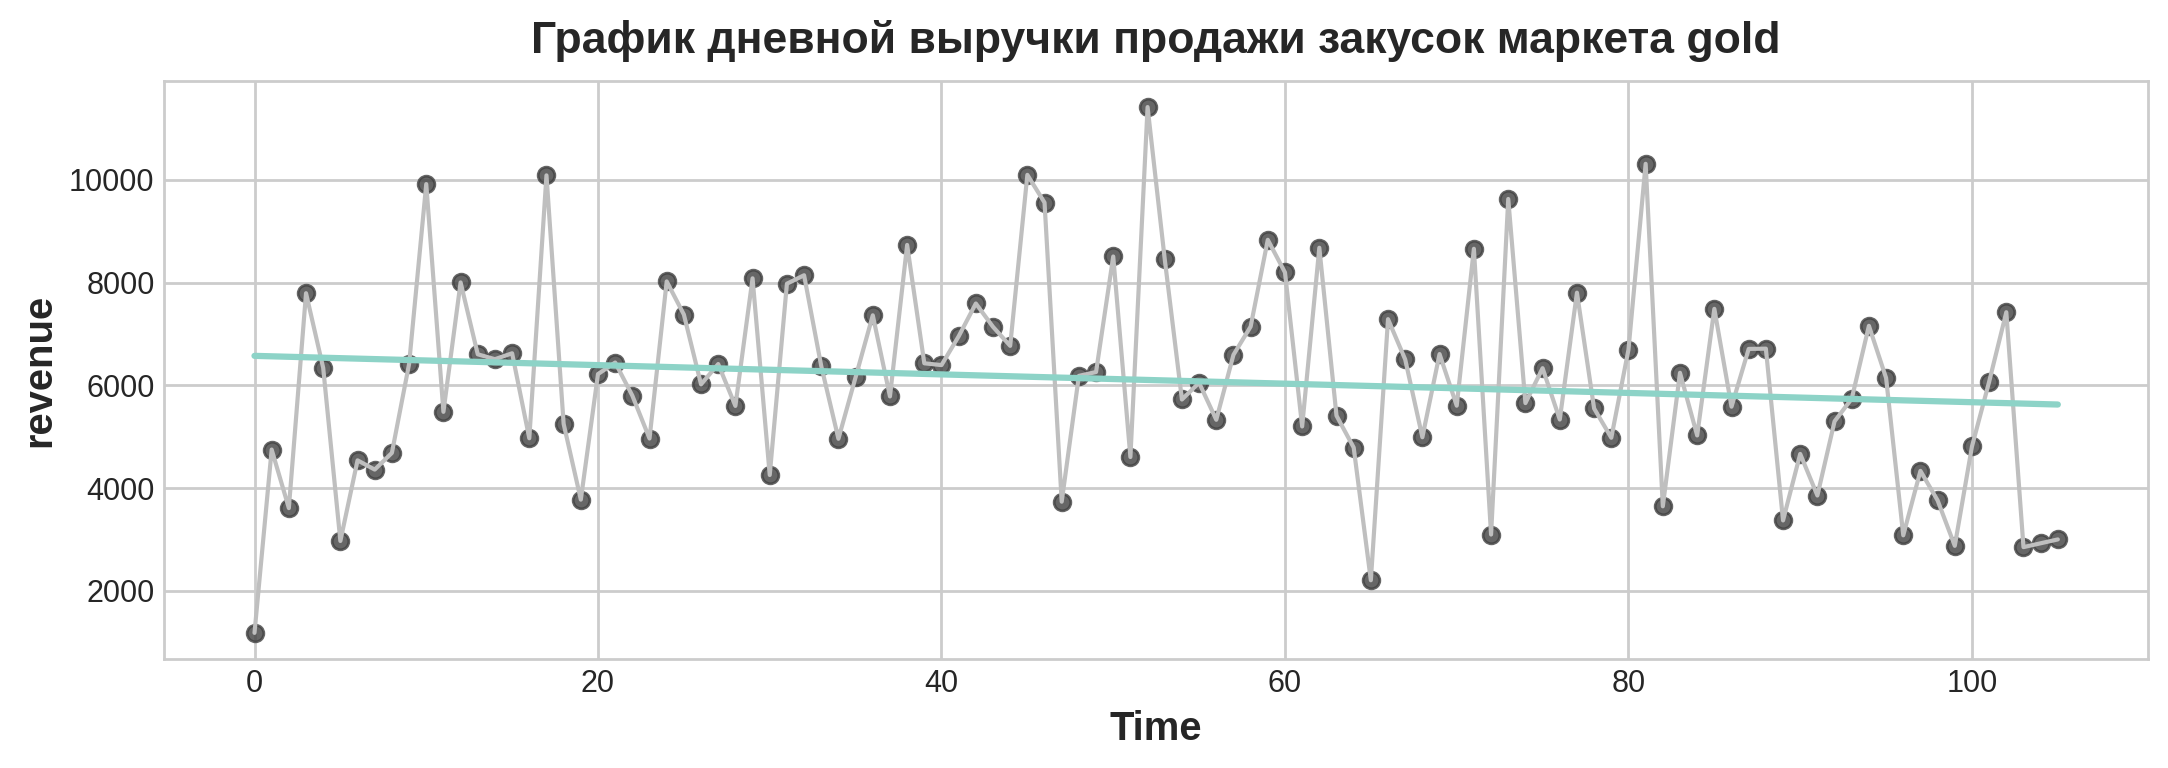

In [59]:
#Строим график тренда продаж закусок в маркете gold по дням
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'revenue', data= sales_zak, color='0.75')
ax = sns.regplot(x='Time', y='revenue', data=sales_zak, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('График дневной выручки продажи закусок маркета gold');

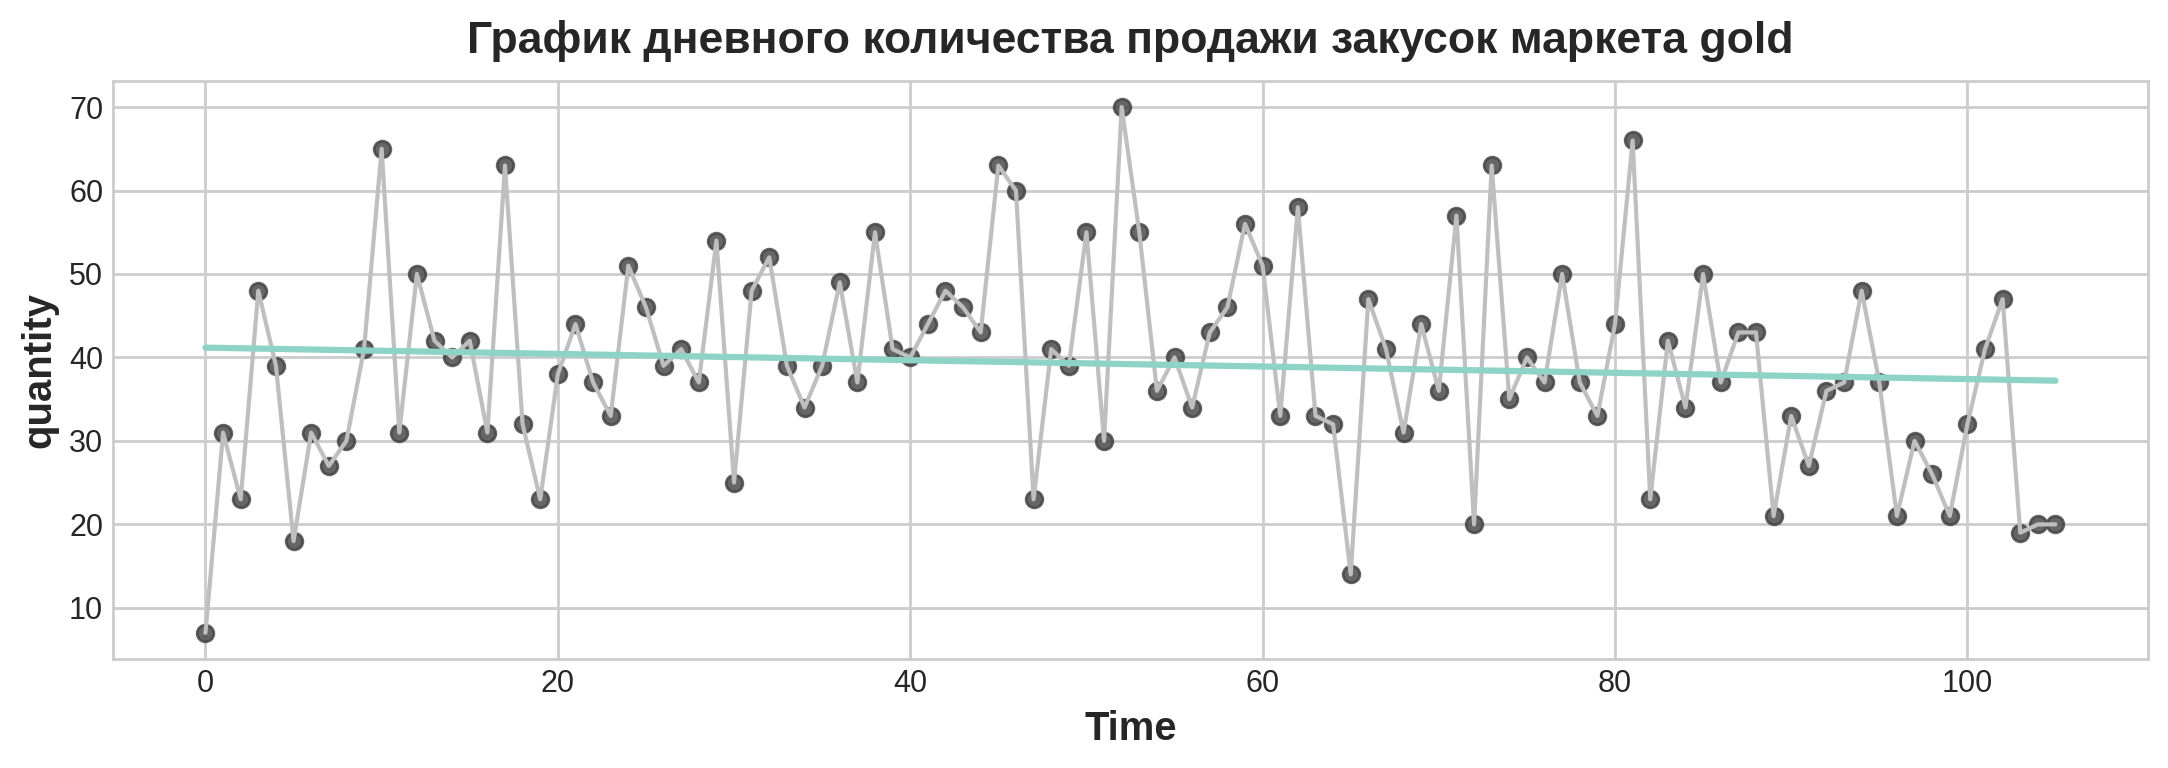

In [60]:
fig, ax = plt.subplots()
ax.plot('Time', 'quantity', data= sales_zak, color='0.75')
ax = sns.regplot(x='Time', y='quantity', data=sales_zak, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('График дневного количества продажи закусок маркета gold');

#Анализ 7 дневного Лага для выручки

In [84]:
sales_zak['Lag_7'] = sales_zak['revenue'].shift(7)
sales_zak.head()

,revenue,quantity,Time,Lag_7
date,,,,
2023-04-26,1180.0,7,0,NaN
2023-04-27,4750.0,31,1,NaN
2023-04-28,3610.0,23,2,NaN
2023-04-29,7795.0,48,3,NaN
2023-04-30,6340.0,39,4,NaN


In [85]:
from sklearn.linear_model import LinearRegression

X = sales_zak.loc[:, ['Lag_7']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = sales_zak.loc[:, 'revenue']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

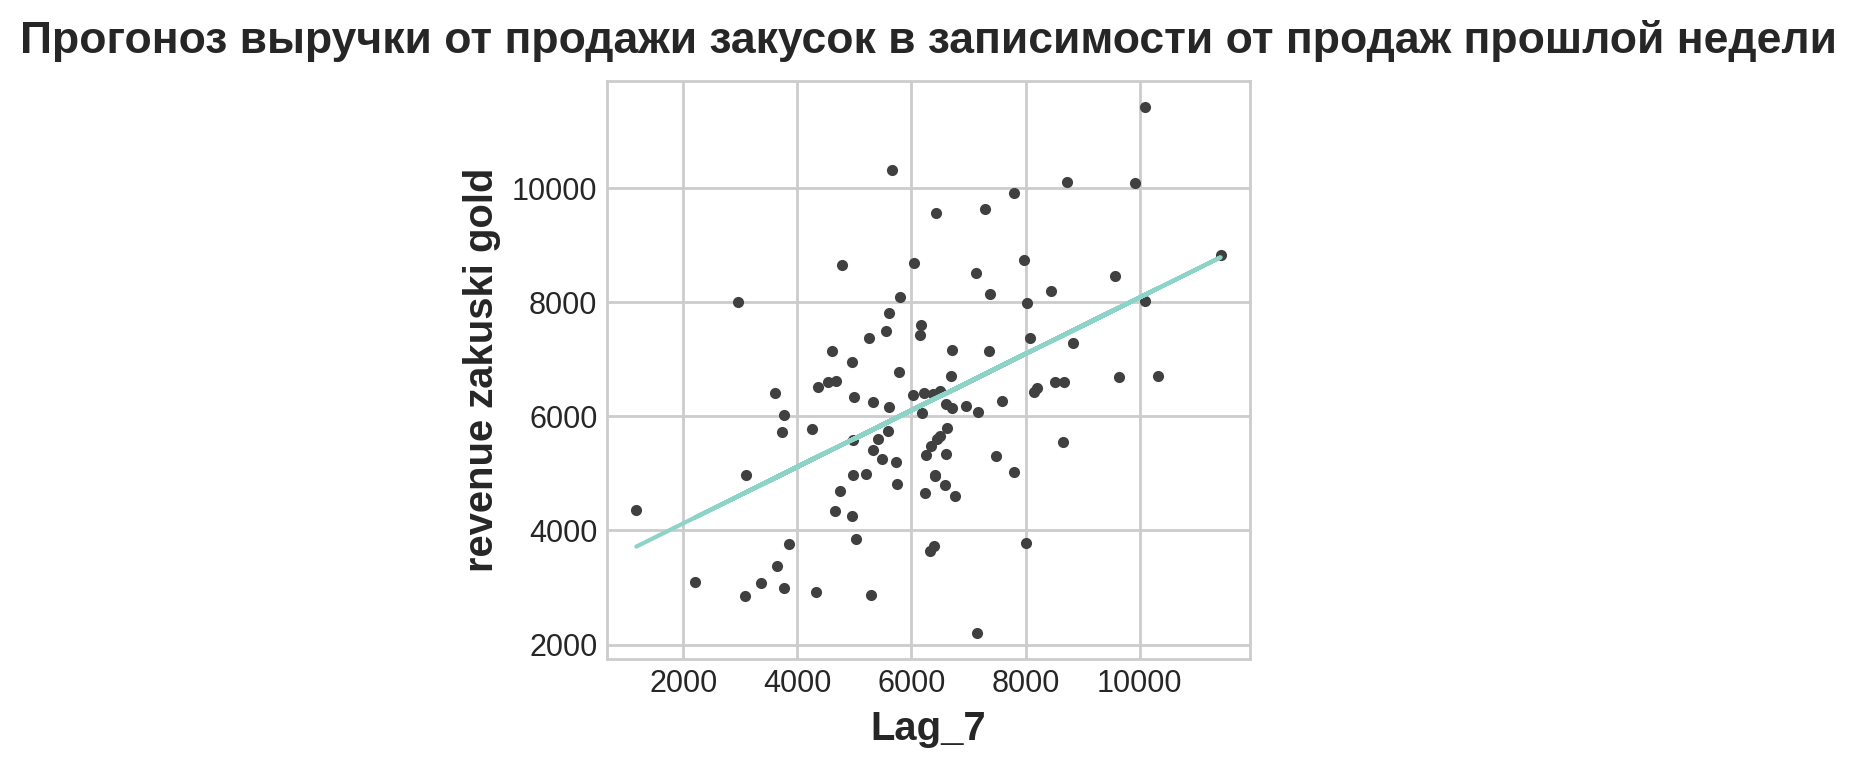

In [86]:
fig, ax = plt.subplots()
ax.plot(X['Lag_7'], y, '.', color='0.25')
ax.plot(X['Lag_7'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('revenue zakuski gold')
ax.set_xlabel('Lag_7')
ax.set_title('Прогоноз выручки от продажи закусок в записимости от продаж прошлой недели');

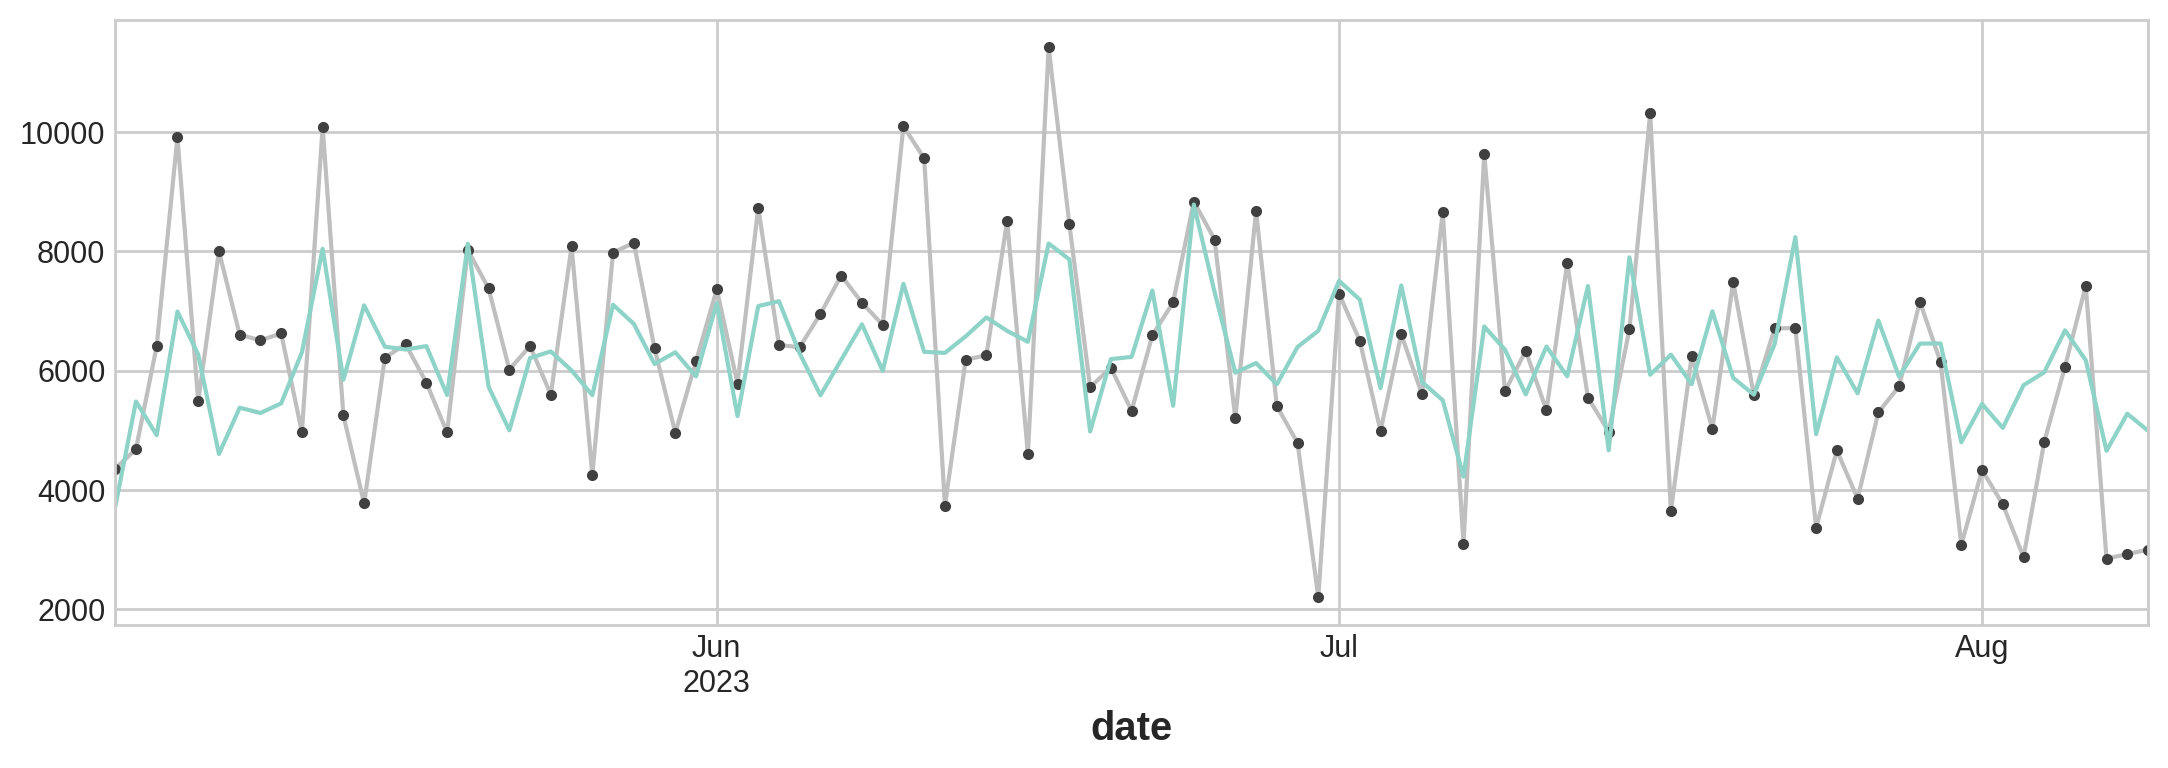

In [90]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


ax = y.plot(**plot_params)
ax = y_pred.plot()

#Анализ 7 дневного Лага для количества

In [96]:
sales_zak['Lag_7q'] = sales_zak['quantity'].shift(7)
X = sales_zak.loc[:, ['Lag_7q']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = sales_zak.loc[:, 'quantity']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)
y_pred_q = pd.Series(model.predict(X), index=X.index)

In [97]:
model.coef_

array([0.47029224])

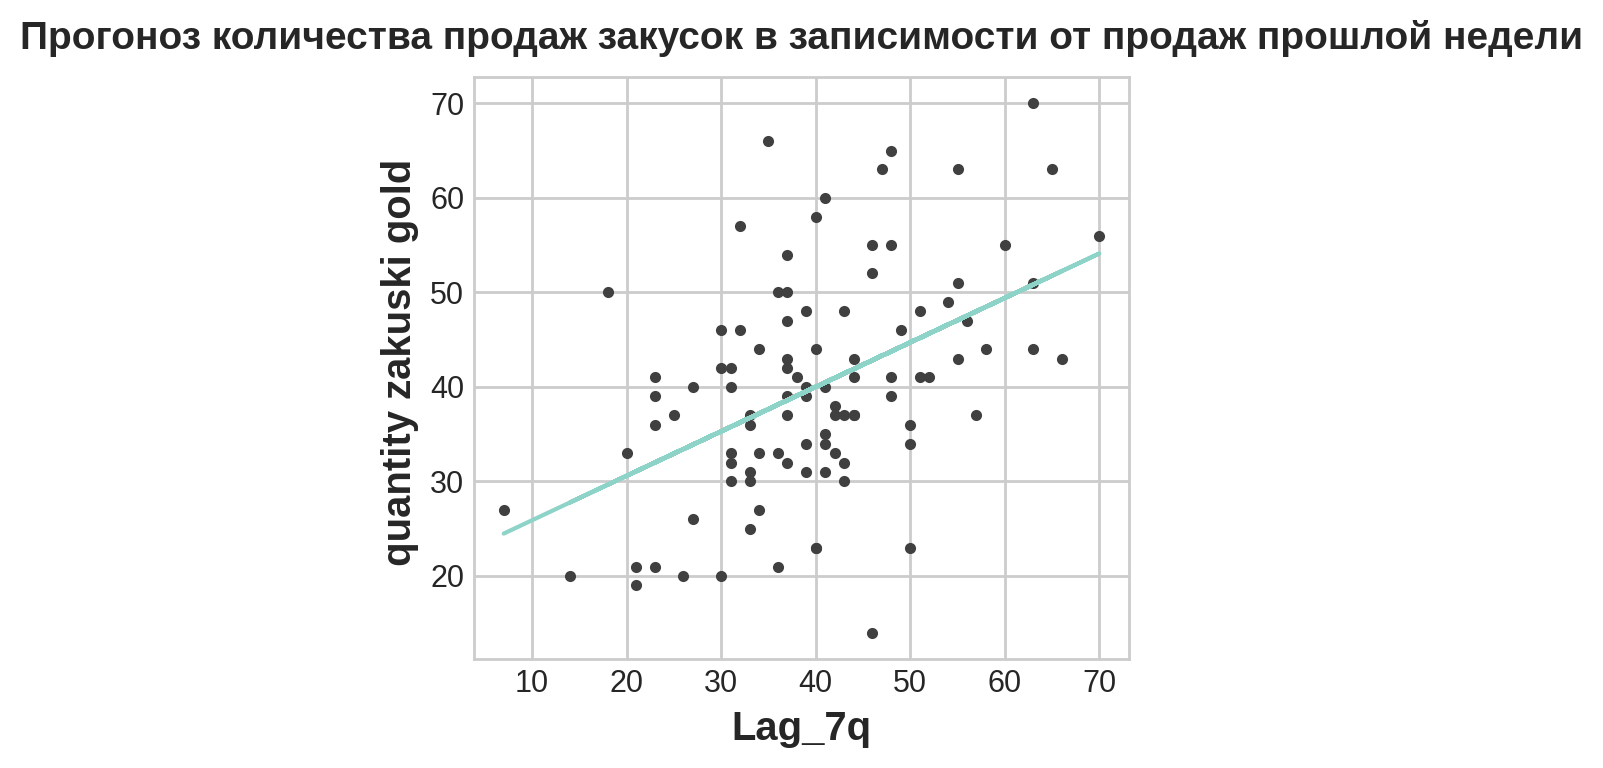

In [94]:
fig, ax = plt.subplots()
ax.plot(X['Lag_7q'], y, '.', color='0.25')
ax.plot(X['Lag_7q'], y_pred_q)
ax.set_aspect('equal')
ax.set_ylabel(' quantity zakuski gold')
ax.set_xlabel('Lag_7q')
ax.set_title('Прогоноз количества продаж закусок в записимости от продаж прошлой недели');

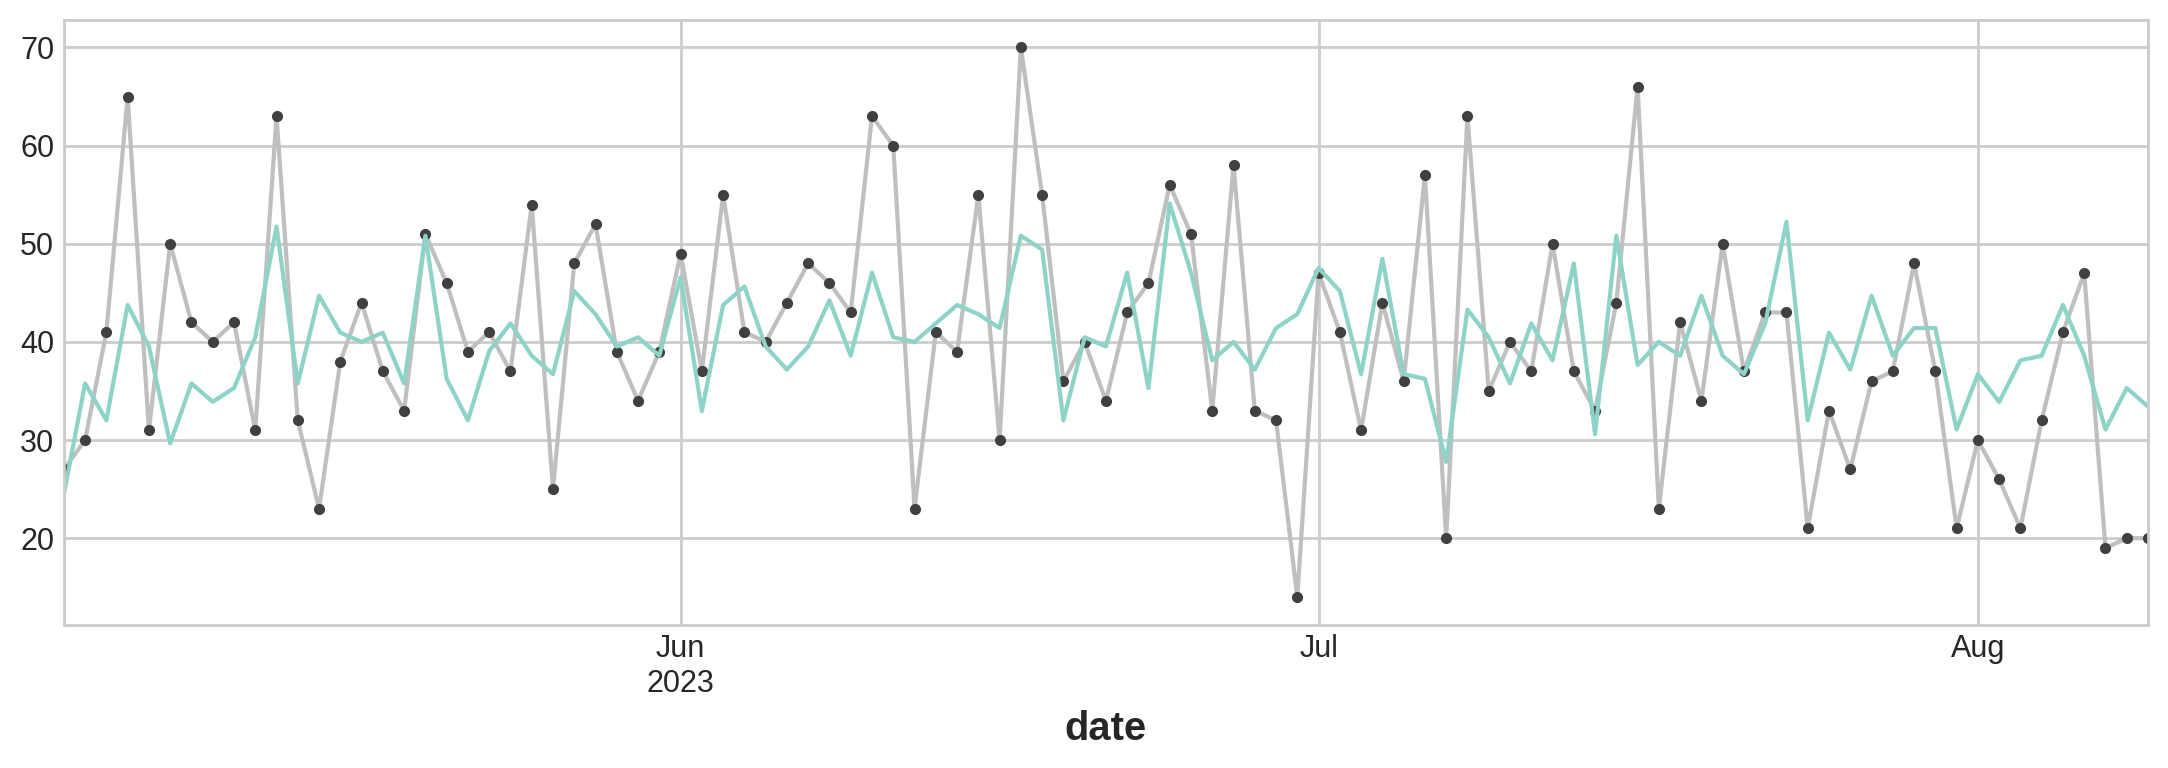

In [98]:
ax = y.plot(**plot_params)
ax = y_pred_q.plot()

##Выявляем аномалии в оперативных данных


In [80]:
def check_anomaly(df, metric, a=2, n=5):
    # функция check_anomaly предлагает алгоритм проверки значения на аномальность посредством
    # сравнения интересующего значения c границами межквартильного размаха
    df['q25'] = df[metric].shift(1).rolling(n).quantile(0.25)
    df['q75'] = df[metric].shift(1).rolling(n).quantile(0.75)
    df['iqr'] = df['q75'] - df['q25']
    df['up'] = df['q75'] + a*df['iqr']
    df['low'] = df['q25'] - a*df['iqr']

    df['up'] = df['up'].rolling(n, center=True, min_periods=1).mean()
    df['low'] = df['low'].rolling(n, center=True, min_periods=1).mean()

    if df[metric].iloc[-1] < df['low'].iloc[-1] or df[metric].iloc[-1] > df['up'].iloc[-1]:
        is_alert = 1
    else:
        is_alert = 0

    return is_alert, df

In [81]:
def run_alerts(chat=None):
    chat_id = chat or -938827375
    bot = telegram.Bot(token='6338759631:AAEHYNAhcMOhNonovJCgjGBX-l_nI_Afa6Y')
    data = df[['created_at', 'revenue', 'date_with_hour', 'date']]
    #print(data)
    #print(data.columns)
    #exit()

    metric_list = ['revenue']
    for metric in metric_list:
        print(metric)
        df=data[['created_at','date_with_hour', 'date', metric]].copy()
        is_alert, df = check_anomaly(df, metric)

        if is_alert == 1 or True:
            msg = '''Внимание, аномальное значение!\nМетрика {metric}:\nтекущее значение = {current_val:.2f}\nотклонение от предыдущего значения {last_val_diff:.2%}'''.format(
                metric = metric,
                current_val = df[metric].iloc[-1],
                last_val_diff = abs(1 - (df[metric].iloc[-1]) / df[metric].iloc[-2]) )

            sns.set(rc={'figure.figsize': (16, 10)})  # задаем размер графика
            plt.tight_layout()

            ax = sns.lineplot(x=df['ts'], y=df[metric], label='metric')
            ax = sns.lineplot(x=df['ts'], y=df['up'], label='up')
            ax = sns.lineplot(x=df['ts'], y=df['low'], label='low')

            for ind, label in enumerate(ax.get_xticklabels()):  # этот цикл нужен чтобы разрядить подписи координат по оси Х,
                if ind % 2 == 0:
                    label.set_visible(True)
                else:
                    label.set_visible(False)

            ax.set(xlabel='time')  # задаем имя оси Х
            ax.set(ylabel=metric)  # задаем имя оси У

            ax.set_title(metric)  # задае заголовок графика
            ax.set(ylim=(0, None))  # задаем лимит для оси У

            # формируем файловый объект
            plot_object = io.BytesIO()
            ax.figure.savefig(plot_object)
            plot_object.seek(0)
            plot_object.name = '{0}.png'.format(metric)
            plt.close()

            # отправляем алерт
            bot.sendMessage(chat_id=chat_id, text=msg)
            bot.sendPhoto(chat_id=chat_id, photo=plot_object)

In [82]:
############################################################################

 ## 1 Задание


Наиболее важная вещь, которую здесь надо провернуть — это посчитать, сколько раз каждый пост просмотрели и лайкнули. Например, в pandas это можно сделать так:

In [83]:
agg_df = df_f[["post_id", "action", "user_id"]].groupby(["post_id", "action"],
                                                       as_index = False).count()\
   .pivot(index = "post_id", columns="action", values="user_id")

NameError: ignored

In [ ]:
agg_df.head(8)

Стоит обратить внимание на тот факт, что у нас есть данные без лайков, но с просмотрами — на месте лайков в датафрейме будут NaN. Поэтому стоит заполнить их нулями при помощи .fillna(0). Можно также поискать посты, которые даже не посмотрели (вычислив их по id), но особой пользы для нас они в данном случае не имеют.

Посмотреть на описательные статистики можно через .describe():

In [ ]:
agg_df.fillna(0).describe().round(2)

Опять же, точные числа могут разниться. Но мы можем сделать следующие выводы:

Просмотров в среднем больше, чем лайков (было бы странно, будь это наоборот).
До миллионов просмотров нашим постам явно далеко.
Среднее и медиана довольно сильно различаются.

##2 Задание

Если вы сделали прошлый шаг, то нарисовать распределение данных не так и сложно! Воспользуемся для этого функцией sns.histplot() из пакета seaborn:

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid") #чтобы выглядело симпатичнее

sns.histplot(x="view", data=agg_df)
sns.histplot(x="like", data=agg_df)

Что мы здесь явно можем сказать? Пик примерно около нуля действительно заметен. Асимметрия здесь правосторонняя — или, как её ещё называют, положительная. Подгрупп не видно.

Осталось разобраться с QQ-графиками! Так как наши распределения фактически находятся на разных шкалах, стоит привести их к единым среднему и стандартному отклонению. Это можно сделать, например, так:

In [ ]:
z_data = agg_df.copy()

z_data["like"] = (z_data["like"] - z_data["like"].mean())/z_data["like"].std()
z_data["view"] = (z_data["view"] - z_data["view"].mean())/z_data["view"].std()

z_data.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples

def plot_qq(x, y, line='45', xlabel='', ylabel=''):
    sns.set(style="whitegrid")
    qqplot_2samples(x, y, line=line)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_qq(z_data["like"], z_data["view"], line="45", xlabel="Квантили просмотров", ylabel="Квантили лайков")

Если бы наши распределения идеально совпадали по своей форме, то все легло бы на прямую линию. Однако мы можем заметить по этой картинке, что ближе к правой части графика точки уходят от линии все дальше и дальше. Таким образом, мы можем сделать вывод, что в своих правых "хвостах" распределения отличаются друг от друга.

##3 Задание

#CTR посчитать и нарисовать не очень сложно:

In [ ]:
agg_df['ctr'] = agg_df['like'] / agg_df['view']

sns.histplot(x="ctr", data=agg_df)

Видно, что асимметрия не такая резкая, но всё же присутствует!

А вот посчитать время существования каждого поста может быть сложнее. Сделать это возможно, например, так:

In [ ]:
df_f['time'] = pd.to_datetime(df_f['time'])

In [ ]:
#ищем первое и последнее время появления каждого поста в датафрейме
lifetime = df_f.groupby("post_id", as_index = False).agg({"time":["min", "max"]})

#у нас вышел мультииндекс в колонках
#поэтому обращаемся к ним вот таким странным образом
#разницу между последним и первым мы обращаем в секунды

lifetime["lifetime"] = (lifetime[("time", "max")] -
                        lifetime[("time", "min")])/np.timedelta64(1, 's')
lifetime = lifetime.drop([("time", "min"), ("time", "max")], axis=1) #избавляемся от лишнего

lifetime.head()

In [ ]:
#Сколько в среднем живет один пост?
lifetime.lifetime.mean() / 3600 #(количество секунд в часе)

Дальше нужно объединить эти данные с оставшимися метриками и построить корреляционную матрицу:

In [ ]:
all_cols = agg_df.sort_values("post_id").merge(lifetime.sort_values("post_id"),
                                               on="post_id", how="inner").drop("post_id",
                                                                                axis=1)


all_cols




In [ ]:
#строим коррматрицу по Кэндаллу
#можно взять другой вид корреляции
#но всё равно видно, что лайки и посты коррелируют сильнее всего
all_cols.corr(method = "kendall")

Ну и на графике видно, что с линейными взаимосвязями у нас негусто:

In [ ]:
sns.pairplot(all_cols)

##4 Задание


In [ ]:
df_f.info()

In [ ]:
df_f.time.max()

Теперь рисуем динамику! Общая динамика всех действий с постами выглядит примерно так (с шагом в час):

In [ ]:
df_f.set_index("time").resample(rule="H").action.count().plot()
pand_dyn.set_index("time").resample(rule="D").user_id.nunique().plot()
pand_dyn.set_index("time").resample(rule="D").post_id.nunique().plot()

DAU у нас выглядит так — тот самый "постоянный рост с небольшими флуктуациями", хотя видны и изменения более крупного масштаба

In [ ]:
df_f.set_index("time").resample(rule="D").user_id.nunique().plot()

Если смотреть на посты, то их количество реально быстро растёт в самом начале существования нашего стартапа, а затем превращается в стационарный временной ряд:

In [ ]:
df_f.set_index("time").resample(rule="D").post_id.nunique().plot()

##5 Задание

Декомпозиция временного ряда делается достаточно просто:

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
global_time = df_f.set_index("time").resample(rule="H").action.count()

#можно поиграть с параметрами сезонности, тренда и другими аргументами функции

res = STL(global_time, robust=True).fit() #сделаем менее подверженную выбросам декомпозицию
res.plot()

Самым первым идёт временной ряд, который мы и пытаемся декомпозировать.

Затем идёт тренд — как меняется средняя тенденция временного ряда. Можно настроить аргумент trend, туда можно подавать целые нечётные числа, таким образом настраивая "извилистость" тренда. Здесь можно задать более высокие значения аргумента, чтобы линия была более гладкой.

Дальше идёт дневная сезонность — почасовые колебания активности в течение дня. Можно обратить внимание на то, что у нас явная мультипликативная сезонность.

Наконец, последними идут остатки модели — всё то, что осталось после выделения тренда и сезонности. В них не должно быть каких-то явных паттернов, их наличие может означать неадекватность нашей декомпозиции.

##6 Задание

Здесь нам нужно было посчитать активность пользователей в каждый час дня, а также оценить популярность разных часов для выпуска постов. Начнём с активности пользователей:

In [ ]:
df["hour"] = df.time.dt.hour #извлекаем часовую часть времени
users = pand_dyn.groupby("hour", as_index=False).user_id.count()

sns.barplot(x="hour", y="user_id", data=users)

Что можно видеть:

С 9 до 16 действительно пользовательская активность довольно стабильная (хоть и немного снижается к 14 часам).
Рост активности пользователей явно нелинеен.
Наименьшая активность наблюдается в 4 утра.
Это было легко. С постами будет чуть сложнее:

In [ ]:
#надо найти, когда в первый раз встречается каждый пост
first_occurence = df.groupby("post_id", as_index=False).time.min()

#извлечём час дня, как в прошлый раз
first_occurence["hour"] = first_occurence.time.dt.hour

#считаем посты
posts = first_occurence.groupby("hour", as_index=False).post_id.count()

sns.barplot(x="hour", y="post_id", data=posts)

Что мы видим здесь:

Публикация явно не круглосуточная: с 3 до 8 у нас радиомолчание.
Пик активности наблюдается в 20 часов.
Это на час позже, чем пик активности пользователей (19 часов).

In [ ]:
df = pd.DataFrame({
    "booking_id": [1001, 1002, 1003, 1004, 1005],
    "property" : ["A", "A", "B", "B", "C"],
    "created_at": ["2022-03-01", "2022-02-10", "2022-04-12",
                   "2022-04-11", "2022-06-05"],
    "checkin_date": ["2022-06-01", "2022-06-10", "2022-06-02",
                     "2022-06-20", "2022-08-10"],
    "checkout_date": ["2022-06-06", "2022-06-15",
                      "2022-06-06","2022-06-28", "2022-08-16"],
    "amount": [5400, 5600, 4800, 9000, 6500]
})
# изменение типа данных
date_cols = ["created_at","checkin_date","checkout_date"]
df[date_cols] = df[date_cols].astype("datetime64[ns]")
# вывод объекта DataFrame
df

In [ ]:
# создание столбца year_month
df["year_month"] = df["created_at"].dt.to_period("M")
# вывод объекта DataFrame
df

In [ ]:
df.info()